In [1]:
# Importaciones necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")

1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

Distribución porcentual:
fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


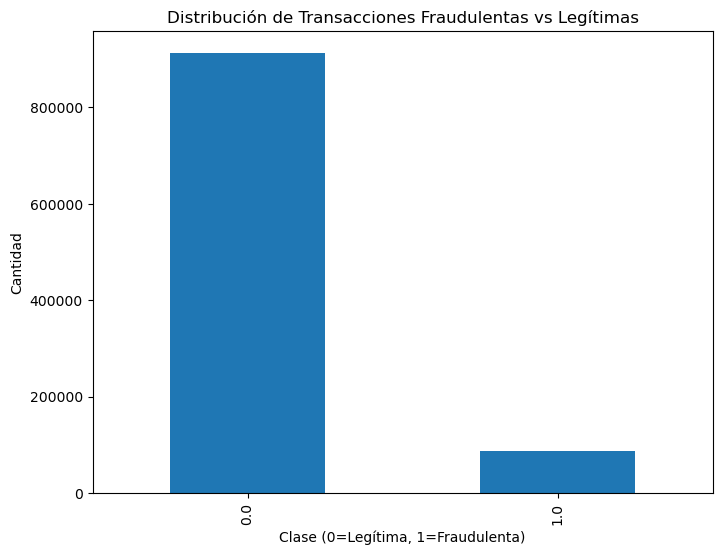

In [2]:
# Visualización de la distribución
plt.figure(figsize=(8, 6))
fraud['fraud'].value_counts().plot(kind='bar')
plt.title('Distribución de Transacciones Fraudulentas vs Legítimas')
plt.xlabel('Clase (0=Legítima, 1=Fraudulenta)')
plt.ylabel('Cantidad')

# Mostrar porcentajes
print("Distribución porcentual:")
print(fraud['fraud'].value_counts(normalize=True) * 100)

2. Train a LogisticRegression.

In [3]:
# Preparación de datos
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

c:\Users\est_c\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric

In [4]:
print("Resultados del modelo base:")
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Resultados del modelo base:

Matriz de confusión:
[[181275   1282]
 [  7184  10259]]

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.59      0.71     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.79      0.84    200000
weighted avg       0.96      0.96      0.95    200000



4. Run Oversample in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?

In [ ]:
# Separar las clases
fraud_majority = fraud[fraud.fraud==0]
fraud_minority = fraud[fraud.fraud==1]

# Realizar oversampling de la clase minoritaria
fraud_minority_upsampled = resample(fraud_minority,
                                  replace=True,
                                  n_samples=len(fraud_majority),
                                  random_state=42)

# Combinar las clases balanceadas
fraud_upsampled = pd.concat([fraud_majority, fraud_minority_upsampled])

# Preparar datos balanceados
X_upsampled = fraud_upsampled.drop('fraud', axis=1)
y_upsampled = fraud_upsampled.fraud

# División de datos
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_upsampled, y_upsampled, 
                                                                test_size=0.2, 
                                                                random_state=42)

# Entrenamiento y evaluación
model_up = LogisticRegression(random_state=42)
model_up.fit(X_train_up, y_train_up)
y_pred_up = model_up.predict(X_test)

print("Resultados con Oversampling:")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_up))

5. Now, run Undersample in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [ ]:
# Realizar undersampling de la clase mayoritaria
fraud_majority_downsampled = resample(fraud_majority,
                                    replace=False,
                                    n_samples=len(fraud_minority),
                                    random_state=42)

# Combinar las clases balanceadas
fraud_downsampled = pd.concat([fraud_majority_downsampled, fraud_minority])

# Preparar datos balanceados
X_downsampled = fraud_downsampled.drop('fraud', axis=1)
y_downsampled = fraud_downsampled.fraud

# División de datos
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_downsampled, y_downsampled, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

# Entrenamiento y evaluación
model_down = LogisticRegression(random_state=42)
model_down.fit(X_train_down, y_train_down)
y_pred_down = model_down.predict(X_test)

print("Resultados con Undersampling:")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_down))

6. Finally, run SMOTE in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [ ]:
# Realizar un balance combinado (over y under sampling)
# Primero hacemos un oversampling parcial de la minoría
fraud_minority_partial = resample(fraud_minority,
                                replace=True,
                                n_samples=len(fraud_majority)//2,
                                random_state=42)

# Luego hacemos un undersampling parcial de la mayoría
fraud_majority_partial = resample(fraud_majority,
                                replace=False,
                                n_samples=len(fraud_majority)//2,
                                random_state=42)

# Combinar las clases balanceadas
fraud_balanced = pd.concat([fraud_majority_partial, fraud_minority_partial])

# Preparar datos balanceados
X_balanced = fraud_balanced.drop('fraud', axis=1)
y_balanced = fraud_balanced.fraud

# División de datos
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

# Entrenamiento y evaluación
model_bal = LogisticRegression(random_state=42)
model_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = model_bal.predict(X_test)

print("Resultados con Balance Combinado:")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_bal))

# Comparación visual de los resultados
modelos = ['Base', 'Oversampling', 'Undersampling', 'Combinado']
f1_scores = [
    f1_score(y_test, y_pred),
    f1_score(y_test, y_pred_up),
    f1_score(y_test, y_pred_down),
    f1_score(y_test, y_pred_bal)
]

plt.figure(figsize=(10, 6))
plt.bar(modelos, f1_scores)
plt.title('Comparación de F1-Scores entre modelos')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()